# Tarea 5

**Envío del PR inicial:** 15 de octubre

**Aceptación del PR:** 21 de octubre

NOTA: Esta tarea debe entregarse en equipo.

In [1]:
include("Mapeos.jl")
include("AutoDiff.jl")

AutoDiff

In [2]:
using Mapeos
using AutoDiff
using Plots
using LaTeXStrings

gr(grid=false)

Plots.GRBackend()

In [3]:
function newton_dual(f, guess; n_iter=1000)
    xnn = dual(guess)
    for i in 1:n_iter
        xnn = xnn.x - (f(xnn).x / f(xnn).x′)
        xnn = dual(xnn)
    end
    return xnn.x
end

newton_dual (generic function with 1 method)

In [4]:
function compone(f, x, n)
    n_comp = x
    for i in 1:n
        n_comp = f(n_comp)
    end
    return n_comp
end

compone (generic function with 1 method)

In [5]:
Qc(x, c) = x^2 + c

Qc (generic function with 1 method)

In [6]:
fₙ(cn) = (cn[1] - cn[2]) / (cn[2] - cn[3])

fₙ (generic function with 1 method)

## 1

Llamemos $c_n$ el valor del parámetro $c$ donde ocurre la bifurcación de doblamiento de periodo para el mapeo $Q_c(x)=x^2+c$, donde la órbita de periodo $2^n$ nace. Como hemos visto en notebooks anteriores, tenemos que $c_0=1/4$ marca la aparición del atractor de periodo $2^0=1$, $c_1=-1/4$ corresponde a la aparición del atractor de periodo $2^1=2$, $c_2=-3/4$ a la aparición del atractor de periodo $2^2=4$, etc. 

A partir de estos valores y otros que calcularán (al menos deben encontrar $c_6$), definimos la secuencia: $\{f_0, f_1, f_2, \dots\}$, donde

\begin{equation}
f_n = \frac{c_n-c_{n+1}}{c_{n+1}-c_{n+2}} .
\end{equation}

La pregunta es, ¿a qué valor converge esta secuencia?, es decir, dar una estimación de $f_\infty$.


*Hint:* Para realizar este ejercicio deben calcular el atractor para varios valores de $c$, de tal manera que puedan aislar las órbitas de periodo $2^p$ y de ahí determinar varios valores $c_n$. Se requerir suficiente cuidado para obtener una buena aproximación de $c_n$. 
Una opción se basa en recordar/usar que las bifurcaciones de doblamiento de periodo ocurren cuando los puntos de la órbita de periodo $p$ se tornan en repulsores, es decir, $(Q_c^p)'(x)=-1$. Esta opción, entonces, involucra obtener los valores $c_n$ a partir de órbitas periódicas de periodo $2^n$ usando los polinomios $Q_c^{2^p}(x)$ y diferenciación automática.

In [7]:
fn(cn) = (cn[1] - cn[2]) / (cn[2] - cn[3])

fn (generic function with 1 method)

In [8]:
c_range = reverse(-1.5:0.00001:-1.4)

ϵ = 0.001
p = 0
x₀ = 0.
cn = []

for c in c_range
    Q = x -> Qc(x, c)
    m = Mapeo(Q, x₀, 10000)
    atr_pt = dual(m.xnn[end])
    der = compone(Q, atr_pt, Int(2^p)).x
    if abs(der +1) < ϵ
        push!(cn, [der, c])
        p += 1
    end
    x₀ = atr_pt.x
end

In [9]:
cn

1-element Array{Any,1}:
 [-1.00078, -1.46516]

In [10]:
"""
    calcula_cₙ(Fλ, rango_c, n; ϵ=0.01, n_iter=1000)

Calcula el valor aproximado de 'c_n'

"""

function calcula_cₙ(Fλ, rango_c, n; ϵ=0.0001, n_iter=1000, x0=0.)
    cn = []
    deltas = []
    ders = []
    for c in rango_c
        F = x -> Fλ(x, c)
        m = Mapeo(F, x0, n_iter)
        atr = dual(m.xnn[end])
        der = compone(F, atr, Int(2^n)).x′
        #println(der)
        δ = abs(der + 1)
        if δ < ϵ
            push!(cn, c)
            push!(ders, der)
            push!(deltas, δ)
        end
        x0 = atr.x
    end
    if !isempty(deltas)
        _, ind = findmin(deltas)
        return cn[ind]
    else
        return nothing
    end
end

calcula_cₙ

## 2

Repitan el ejercicio anterior para el mapeo $S_c(x) = c \sin(x)$. 

- ¿Cómo se comparan los valores obtenidos de $f_n$? 

- ¿Qué interpretación le pueden dar a este resultado, en comparación del ejercicio anterior?

In [11]:
Sc(x, c) = c*sin(x)

Sc (generic function with 1 method)

In [12]:
pyplot()

Plots.PyPlotBackend()

In [13]:
rango_c = -10:0.005:10
Fs = [x -> Sc(x, c) for c in rango_c];

In [14]:
x₀ = 0.1
mapeos = [Mapeo(F, x₀, 1000) for F in Fs];

In [15]:
ps = [m.xnn[end-100:end] for m in mapeos];

In [16]:
cs = []
for c in rango_c
    for i in 1:101
        push!(cs, c)
    end
end

In [17]:
xn = []
for p in ps
    for x in p
        push!(xn, x)
    end
end

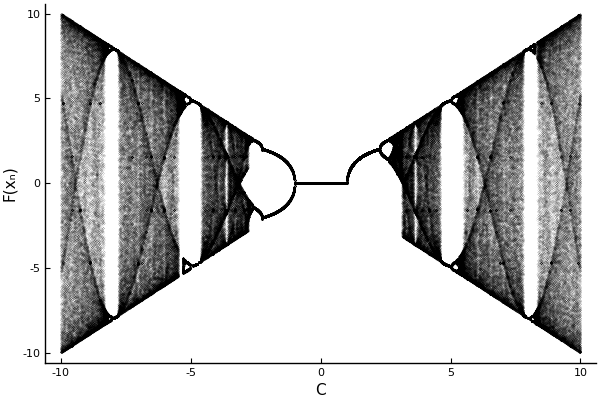

In [18]:
d1 = scatter(cs, xn, ms=0.05, legend=false)
xlabel!("C")
ylabel!("F(xₙ)")

In [19]:
rango_c = 1:0.001:5
Fs = [x -> Sc(x, c) for c in rango_c];

In [20]:
x₀ = 0.1
mapeos = [Mapeo(F, x₀, 1000) for F in Fs];

In [21]:
ps = [m.xnn[end-100:end] for m in mapeos];

In [22]:
cs = []
for c in rango_c
    for i in 1:101
        push!(cs, c)
    end
end

In [23]:
xn = []
for p in ps
    for x in p
        push!(xn, x)
    end
end

In [24]:
d1 = scatter(cs, xn, ms=0.05, legend=false)
xlabel!("C")
ylabel!("F(xₙ)")
vline!(cn2)

LoadError: [91mUndefVarError: cn2 not defined[39m

c_range = 1:0.0000001:2.8

ϵ = 0.001
p = 0
x₀ = 0.1
cn = []

#for c in c_range
    sin = x -> Sc(x, c)
    m = Mapeo(sin, x₀, 10000)
    atr_pt = dual(m.xnn[end])
    der = compone(sin, atr_pt, Int(2^p)).x′
    if abs(der +1) < ϵ
        push!(cn, [p, c])
        p += 1
    end
    x₀ = atr_pt.x
end

In [25]:
rango_c = 2:1e-5:3
c_21 = calcula_cₙ(Sc, rango_c, 0, x0=0.1)

2.26185

In [26]:
rango_c = c_21:1e-7:2.7
c_22 = calcula_cₙ(Sc, rango_c, 1, x0=0.1)

2.6177846

In [ ]:
rango_c = c_22:1e-9:c_22+0.1
c_23 = calcula_cₙ(Sc, rango_c, 2, x0=0.1)

In [ ]:
rango_c = c_23:1e-7:c_23+0.05
c_24 = calcula_cₙ(Sc, rango_c, 3, x0=0.1)

In [ ]:
rango_c = c_24:1e-7:c_24+0.05
c_25 = calcula_cₙ(Sc, rango_c, 4, x0=0.1)

In [ ]:
rango_c = c_25:1e-7:c_25+0.01
c_26 = calcula_cₙ(Sc, rango_c, 5, x0=0.1)

In [274]:
cn2 = [c_21, c_22, c_23, c_24, c_25, c_26]

6-element Array{Any,1}:
 2.26185 
  nothing
 2.6974  
 2.72299 
 2.72993 
  nothing

In [275]:
fₙ(cn2[4:6])

LoadError: [91mMethodError: no method matching -(::Float64, ::Void)[0m
Closest candidates are:
  -(::Float64, [91m::Float64[39m) at float.jl:377
  -(::Float64) at float.jl:367
  -([91m::PyCall.PyObject[39m, ::Any) at C:\Users\Pau Martin\.julia\v0.6\PyCall\src\pyoperators.jl:14
  ...[39m

## 3

Como se ve en la Fig. 1 del diagrama de bifurcaciones de $Q_c$, $x=0$ pertenece a un ciclo de periodo $2^n$ para ciertos valores $C_n$ del parámetro. Dichos valores son *especiales*, ya que el hecho de que $x=0$ pertenezca a un ciclo de periodo $2^n$ define los llamados *ciclos superestable*, donde tenemos $(Q^{2^p}_{C_n})'(0)=0$.

- ¿A qué converge la secuencia $f_n$, definida ahora a partir de los valores $C_n$.

- De los $2^p$ puntos del ciclo de periodo $2^p$, es decir, $\{0, p_1, \dots p_{2^{n-1}}\,\}$ hay uno (distinto del 0) cuya distancia a 0 es la menor; a esa distancia la identificaremos como $d_n$. Calcular numéricamente a qué converge la secuencia $d_n/d_{n+1}$.